In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
iris=datasets.load_iris()
x=iris.data
y=iris.target

In [4]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

cov_matrix=np.cov(x_scaled.T)
print(cov_matrix)
eigenvalues,eigenvectors=np.linalg.eig(cov_matrix)
print("EigenValues:",eigenvalues)
print("EigenVectors:\n",eigenvectors)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]
EigenValues: [2.93808505 0.9201649  0.14774182 0.02085386]
EigenVectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


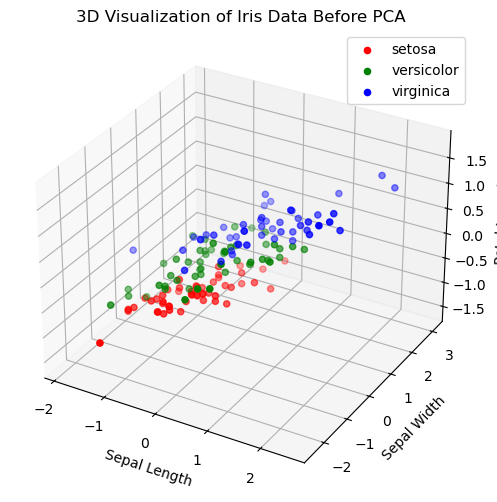

In [8]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection='3d')
colors=['red','green','blue']
labels=iris.target_names
for i in range(len(colors)): 
    ax.scatter(x_scaled[y==i,0],x_scaled[y==i,1],x_scaled[y==i,2],color=colors[i],label=labels[i])
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Visualization of Iris Data Before PCA')
plt.legend()
plt.show()

In [9]:
U,S,Vt=np.linalg.svd(x_scaled,full_matrices=False)
print("Singular Values:",S)

Singular Values: [20.92306556 11.7091661   4.69185798  1.76273239]


In [11]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(x_scaled)

In [16]:
explained_variance=pca.explained_variance_ratio_
print(f"Explained Variance by PC1:{explained_variance[0]:.2f}")
print(f"Explained Variance by PC2:{explained_variance[1]:.2f}")

Explained Variance by PC1:0.73
Explained Variance by PC2:0.23


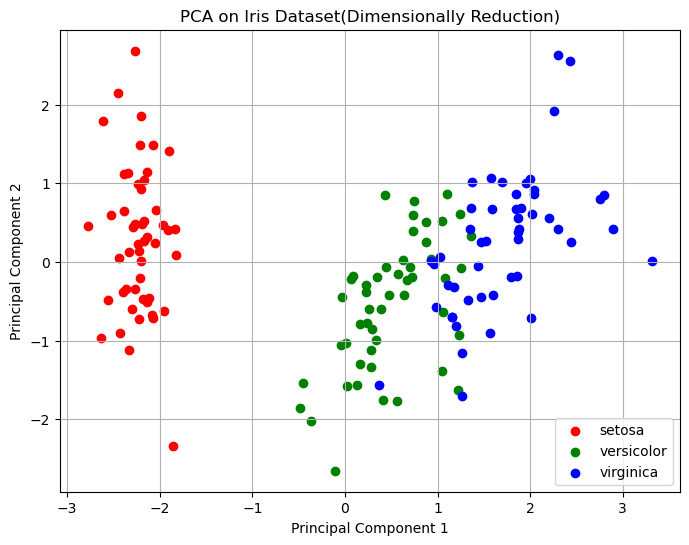

In [17]:
plt.figure(figsize=(8,6))
for i in range(len(colors)): plt.scatter(X_pca[y==i,0],X_pca[y==i,1],color=colors[i],label=labels[i])
plt.xlabel('Principal Component 1')

plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset(Dimensionally Reduction)')
plt.legend()
plt.grid()
plt.show()

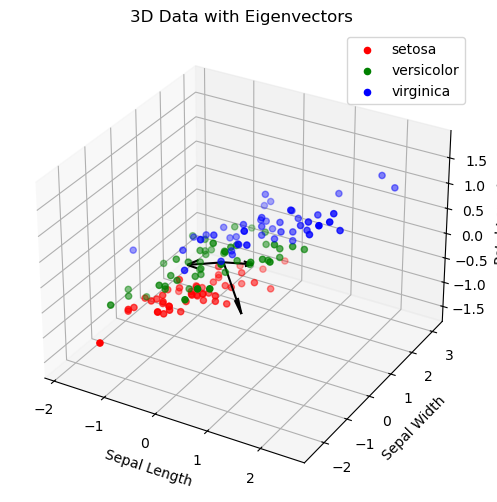

In [19]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection='3d')
for i in range(len(colors)): 
    ax.scatter(x_scaled[y==i,0],x_scaled[y==i,1],x_scaled[y==i,2],color=colors[i],label=labels[i])
for i in range(3): 
    ax.quiver(0,0,0,eigenvectors[i,0],eigenvectors[i,1],eigenvectors[i,2],color='black',length=1)
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

ax.set_title('3D Data with Eigenvectors')
plt.legend()
plt.show()